In [83]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from google.colab                 import drive

In [84]:
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [85]:
path = '/content/gdrive/MyDrive/Colab Notebooks/Modelos de Regressão Linear/German Credit /german_credit_data.csv'
df_credit = pd.read_csv(path)
df_credit.shape

(1000, 10)

In [86]:
df_credit.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


In [87]:
df_credit.dtypes

Unnamed: 0           int64
Age                  int64
Sex                 object
Job                  int64
Housing             object
Saving accounts     object
Checking account    object
Credit amount        int64
Duration             int64
Purpose             object
dtype: object

In [88]:
df_credit.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64

### Tratamento e visualização de dados 

In [89]:
df_credit = df_credit.drop('Unnamed: 0', axis=1)
df_credit = df_credit.dropna()

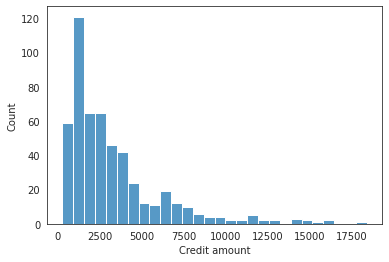

In [90]:
sns.histplot(df_credit['Credit amount'])

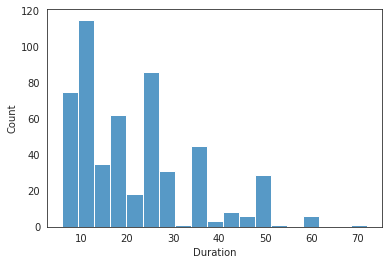

In [91]:
sns.histplot(df_credit['Duration'])

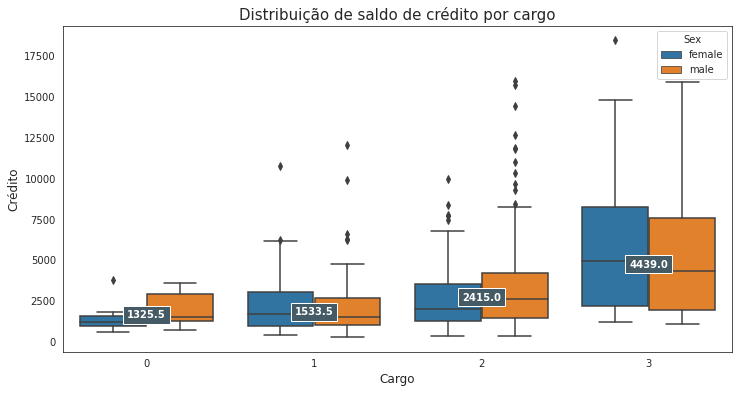

In [92]:
sns.set_style("white")
f, ax = plt.subplots(figsize=(12, 6))
box_plot = sns.boxplot(x="Job", y="Credit amount", hue='Sex', data=df_credit)

medians = df_credit.groupby(['Job'])['Credit amount'].median()
vertical_offset = df_credit['Credit amount'].median() * 0.05

for xtick in box_plot.get_xticks():
    box_plot.text(xtick,medians[xtick] + vertical_offset,medians[xtick], 
            horizontalalignment='center', size=10, color='w', weight='semibold', bbox=dict(facecolor='#445A64'))
ax.set_title('Distribuição de saldo de crédito por cargo', fontsize=15)
ax.set_xlabel('Cargo', fontsize=12)
ax.set_ylabel('Crédito', fontsize=12)
ax;

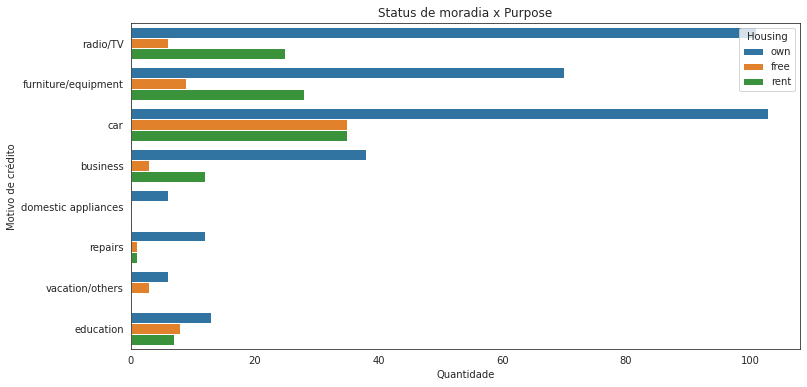

In [93]:
f, ax = plt.subplots(figsize=(12, 6))
sns.countplot(y='Purpose', hue='Housing', data=df_credit, orient='h')
ax.set_title('Status de moradia x Purpose', fontsize=12)
ax.set_xlabel('Quantidade', fontsize=10)
ax.set_ylabel('Motivo de crédito', fontsize=10)
ax

#### Features Engineering

In [94]:
df_encoding = df_credit
categorical_columns = ['Purpose','Saving accounts','Checking account']
for col in categorical_columns:
    col_ohe = pd.get_dummies(df_credit[col], prefix=col)
    df_encoding = pd.concat((df_encoding, col_ohe), axis=1).drop(col, axis=1)

In [99]:
df_encoding.tail()

,Age,Sex,Job,Housing,Credit amount,Duration,Purpose_business,Purpose_car,Purpose_domestic appliances,Purpose_education,...,Purpose_radio/TV,Purpose_repairs,Purpose_vacation/others,Saving accounts_little,Saving accounts_moderate,Saving accounts_quite rich,Saving accounts_rich,Checking account_little,Checking account_moderate,Checking account_rich
989,48,male,1,own,1743,24,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
993,30,male,3,own,3959,36,0,0,0,0,...,0,0,0,1,0,0,0,1,0,0
996,40,male,3,own,3857,30,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
998,23,male,2,free,1845,45,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
999,27,male,2,own,4576,45,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0


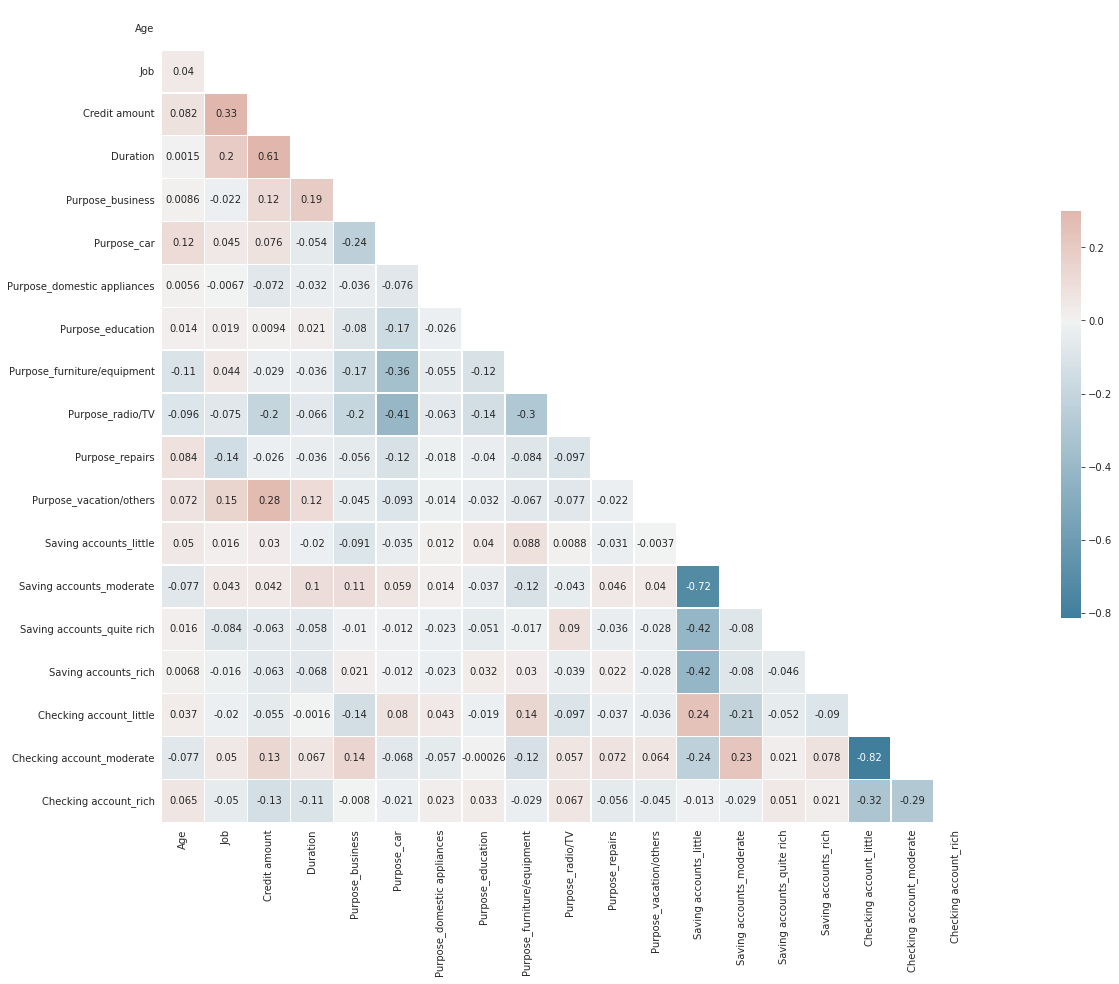

In [98]:
corr = df_encoding.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(30, 15))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, annot=True,
            square=True, linewidths=.6, cbar_kws={"shrink": .5})